Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [19]:

# https://github.com/guy1997/guy_yagil_ex3

import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples) :
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

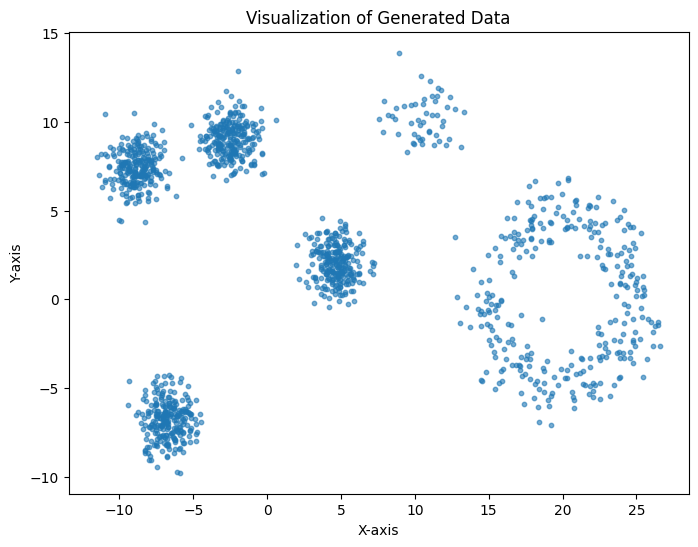

In [8]:
X = create_data(1.0, 1000, 50, 300, 200)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.6)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Visualization of Generated Data")
plt.show()


3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = create_data(1.0, 1000, 50, 300, 200)

silhouette_scores = []
k_values = range(2, 7)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

best_k = k_values[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=42, n_init=10)

labels = kmeans.fit_predict(X)

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=6)
labels_agg = agg_clustering.fit_predict(X)


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [13]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbs_label = dbscan.fit_predict(X)

6. Compare the results and choose the best method for the data


K-Means: Silhouette Score: 0.725
Agglomerative Clustering: Silhouette Score: 0.726
DBSCAN: Silhouette Score: 0.454


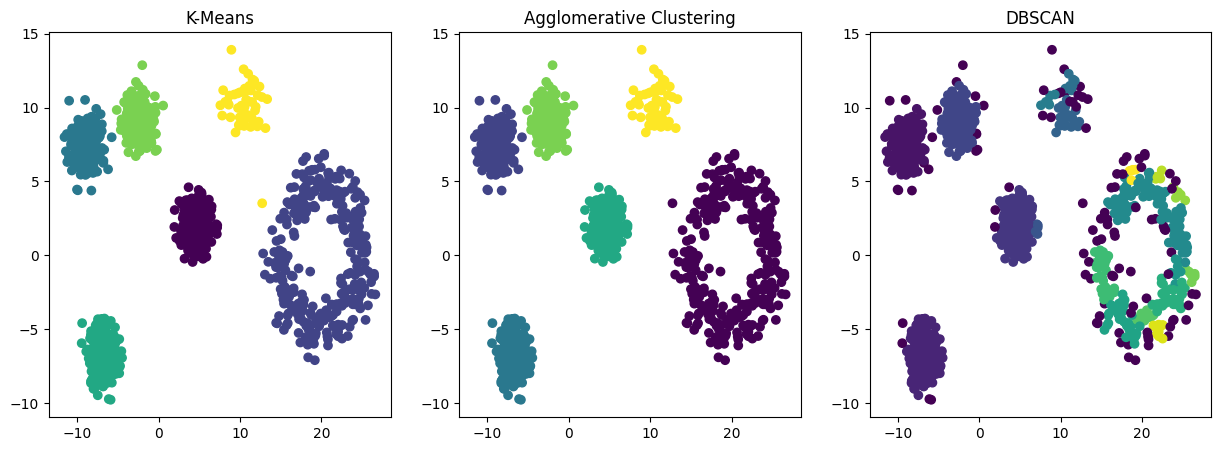

In [18]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def evaluate_clustering(X, labels, method_name):
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        silhouette = silhouette_score(X, labels)
    else:
        silhouette = -1

    print(f"{method_name}: Silhouette Score: {silhouette:.3f}")

evaluate_clustering(X, labels, "K-Means")
evaluate_clustering(X, labels_agg, "Agglomerative Clustering")
evaluate_clustering(X, dbs_label, "DBSCAN")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = [("K-Means", labels), ("Agglomerative Clustering", labels_agg), ("DBSCAN", dbscan.labels_)]
for ax, (title, cluster_labels) in zip(axes, models):
    ax.scatter(X[:, 0], X[:, 1], c=cluster_labels)
    ax.set_title(title)

plt.show()